In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 準備

In [ ]:
mkdir data

In [ ]:
cd data

/content/data


In [ ]:
pwd

'/content/data'

In [58]:
import pandas as pd

In [59]:
# csvの読み込み、データフレーム準備
df = pd.read_csv('breast_cancer.csv')

In [60]:
# 先頭３行の表示
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [61]:
# 末尾３行の表示
df.tail(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [62]:
# カテゴリ特徴量とすべき列の有無を確認する
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [63]:
# データの形状と欠損数
print(df.shape)
print('欠損の数：{}'.format(df.isnull().sum().sum()))

(569, 31)
欠損の数：0


In [64]:
# ライブラリのインポート
from sklearn.model_selection import train_test_split

In [65]:
# 説明変数と目的変数を設定
x = df.drop('target', axis=1)
y = df['target']

# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [66]:
# 分割後のデータ型の確認
print("x_train:{}".format(type(x_train)))
print("y_train:{}".format(type(y_train)))


x_train:<class 'pandas.core.frame.DataFrame'>
y_train:<class 'pandas.core.series.Series'>


In [67]:
# モデルのインポート（ロジスティック回帰）
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# モデルの構築
model = LogisticRegression(max_iter=5000)
# 学習
model.fit(x_train, y_train)
# 予測
pred_y = model.predict(x_test)
# モデル名の取り出し、正解率の計算、出力
model_name = model.__class__.__name__
score = accuracy_score(y_test, pred_y)
print(model_name + ":" + str(score))

LogisticRegression:0.9473684210526315


In [68]:
# アルゴリズムごとの評価を出してみる
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# クラス分類
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import DecisionTreeClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
# 近傍法
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# 各モデルのインスタンスをリストに格納
models = [LogisticRegression(max_iter=5000), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
# 評価比較用の空リストの用意
model_name = []
score = []

# 各モデルをfor文で順に取り出して処理
for model in models:
   model.fit(x_train, y_train)
   pred_y = model.predict(x_test)
   model_name.append(model.__class__.__name__)
   score.append(accuracy_score(y_test, pred_y))

pd.DataFrame({'model':model_name, 'score':score})

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


,model,score
0,LogisticRegression,0.947368
1,LinearSVC,0.912281
2,DecisionTreeClassifier,0.912281
3,RandomForestClassifier,0.947368
4,KNeighborsClassifier,0.938596


In [70]:
# ---------------------------------------------
# たまたま高いスコアとなった可能性があるので
# １０回繰り返してみる
# ---------------------------------------------

In [71]:
# 各モデルのインスタンスをリストに格納
models = [LogisticRegression(max_iter=5000), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

# 結果表示用のデータフレームにカラム名だけ設定
model_name = []
for model in models:
   model_name.append(model.__class__.__name__)
result = pd.DataFrame(columns = model_name)

# 各モデルをfor文で順に取り出して処理、を10回繰り返す
for i in range(10):
   model_name = []
   score = []
   for model in models:
       model.fit(x_train, y_train)
       pred_y = model.predict(x_test)
       model_name.append(model.__class__.__name__)
       score.append(accuracy_score(y_test, pred_y))
   result = result.append(pd.Series(score, index=model_name, name=i+1))

result

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

,LogisticRegression,LinearSVC,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier
1,0.947368,0.938596,0.912281,0.956140,0.938596
2,0.947368,0.956140,0.912281,0.964912,0.938596
3,0.947368,0.938596,0.903509,0.956140,0.938596
4,0.947368,0.763158,0.903509,0.964912,0.938596
5,0.947368,0.947368,0.912281,0.956140,0.938596
6,0.947368,0.956140,0.903509,0.964912,0.938596
7,0.947368,0.903509,0.903509,0.956140,0.938596
8,0.947368,0.929825,0.912281,0.956140,0.938596
9,0.947368,0.921053,0.903509,0.964912,0.938596
10,0.947368,0.701754,0.903509,0.956140,0.938596


In [72]:
# dfとtargetを結合
df2 = pd.merge(df, y, left_index=True, right_index=True)
print(len(df2.columns))
# 結合後確認
df2.iloc[:10, -5:]

32


,worst concave points,worst symmetry,worst fractal dimension,target_x,target_y
0,0.2654,0.4601,0.11890,0,0
1,0.1860,0.2750,0.08902,0,0
2,0.2430,0.3613,0.08758,0,0
3,0.2575,0.6638,0.17300,0,0
4,0.1625,0.2364,0.07678,0,0
5,0.1741,0.3985,0.12440,0,0
6,0.1932,0.3063,0.08368,0,0
7,0.1556,0.3196,0.11510,0,0
8,0.2060,0.4378,0.10720,0,0
9,0.2210,0.4366,0.20750,0,0


In [73]:
#相関係数を確認
matrix = df2.corr()
matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_x,target_y
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838,0.012838


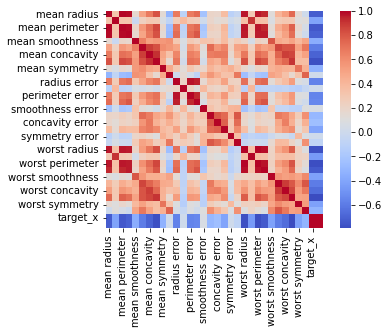

In [74]:
# 相関関係のヒートマップ表示
import seaborn as sns
sns.heatmap(matrix, square=True, cmap='coolwarm')

In [79]:
# 相関の高い列のインデックスを取得
higher_index = matrix[matrix['target_x'] < -0.6].index
print(higher_index)

# 取得した特徴量のデータだけを抜き出す
select_data = df[higher_index]
select_data.head(5)

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625


In [80]:
# 説明変数と目的変数を設定
x = select_data
y = df['target']

# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [81]:
# 各モデルのインスタンスをリストに格納
models = [LogisticRegression(max_iter=5000), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
# 評価比較用の空リストの用意
model_name = []
score = []

# 各モデルをfor文で順に取り出して処理
for model in models:
   model.fit(x_train, y_train)
   pred_y = model.predict(x_test)
   model_name.append(model.__class__.__name__)
   score.append(accuracy_score(y_test, pred_y))

pd.DataFrame({'model':model_name, 'score':score})

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


,model,score
0,LogisticRegression,0.938596
1,LinearSVC,0.947368
2,DecisionTreeClassifier,0.938596
3,RandomForestClassifier,0.947368
4,KNeighborsClassifier,0.938596


In [78]:
# ライブラリをインポート
import pickle

# モデルを保存
with open("breast_cancer.pkl", "wb") as f:
  pickle.dump(model, f)